# Trabalho avaliativo - Sistemas de controle II - 2023.2

**Leia com atenção as instruções abaixo**

*Informe na célula de código abaixo o seu número de matrícula:* 

***Não remova as aspas***

In [29]:
# Informe aqui sua matrícula
mat = '201833940003'

*Depois de informar os dados, execute o arquivo inteiro. Caso ocorra algum erro, peça ajuda ao professor*

*Resolva as questões abaixo, **justificando** todas as respostas. Utilize markdown para escrever texto e Python para fazer as contas. O trabalho é individual*

In [30]:
# 
# Não modifique esta célula! Você pode comprometer a sua avaliação.
from numpy.random import RandomState
from IPython.display import display, Math
from sympy import symbols, sin, cos, latex
from sympy import ImmutableMatrix as matriz
from numpy import arange
import control as ct
import numpy as np
from matplotlib import pyplot as plt

_nn = int(mat[0:4]+mat[-2:])
_rng = RandomState(_nn)
#_dig = arange(-9,10)
#_dig = _dig[_dig!=0]
#_n = _rng.randint(0,_dig.size,20)
_n = _rng.random(size=(4,)).round(3)
def G(): 
    s = symbols('s')
    c = .5+0.10*_n[0]
    d = .5+0.25*_n[1]
    a = .2+0.15*_n[2]
    b = 9+_n[3]
    b0 = (b*c**2*d).round(3)
    b1 = (a*b*c**2*d).round(3)
    G = (b1*s+b0)/((s+c)**2*(s+d))
    display(Math('G(s) = ' + latex(G)))

## 1.

*Considere o sistema:*

In [31]:
G()

<IPython.core.display.Math object>

In [32]:
den = np.poly([-0.5753, -0.5753,-0.69625])
print("Denominador = ", den)

Denominador =  [1.         1.84685    1.13207534 0.23043793]


1. *Faça uma análise de malha aberta: verifique estabilidade e características de resposta ao degrau unitário (25%). Opcional: analise o que aconteceria caso fosse utilizada realimentação proporcional (+10% extra)*

2. *Proponha especificações de desempenho em malha fechada com base na análise de malha aberta do item 1 (20%).*

3. *Projete um compensador de estados de ordem completa, de acordo com as especificações estabelecidas no item 2 e também forneça rejeição à distúrbios do tipo degrau. Justifique as escolhas de todos os pólos e apresente as funções de transferência do compensador ao final (35%).*

4. *Analise e simule o sistema em malha fechada. Plote e analise os sinais de saída e de controle (20%). Opcional: faça uma análise de resposta a uma perturbação (+10% extra)*

## Solução 1.
1. *Faça uma análise de malha aberta: verifique estabilidade e características de resposta ao degrau unitário (25%). Opcional: analise o que aconteceria caso fosse utilizada realimentação proporcional (+10% extra)*

Obtendo a Função de Transferência da Planta

In [33]:
num = np.array([0.455, 2.234])
Gs = ct.TransferFunction(num, den)
Gs

TransferFunction(array([0.455, 2.234]), array([1.        , 1.84685   , 1.13207534, 0.23043793]))

## Análise da Estabiblidade

Agora podemos verificar os pólos de malha aberta, amortecimento e frequência natual do sistema

In [34]:
ct.damp(Gs);

_____Eigenvalue______ Damping___ Frequency_
   -0.6962                     1     0.6962
   -0.5753                     1     0.5753
   -0.5753                     1     0.5753


os polos são negativos, ou seja, estão na parte esquerda do plano complexo. a consequencia disso e que o sistema é estável.

## Resposta ao degrau em malha aberta

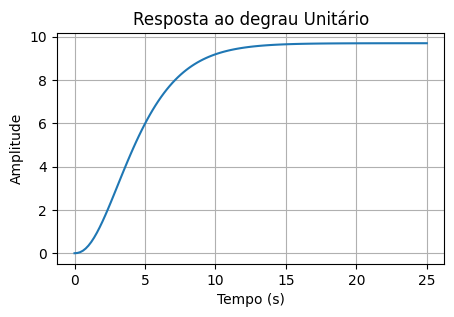

In [35]:
t, y = ct.step_response(Gs, 25)
plt.figure(figsize=(5, 3))
plt.plot(t, y)
plt.title("Resposta ao degrau Unitário")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


Obtendo as características do sistema

In [36]:
ct.step_info(Gs)

{'RiseTime': 6.913250385791657,
 'SettlingTime': nan,
 'SettlingMin': 8.763571920181294,
 'SettlingMax': 9.69458477125512,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 9.488737258747634,
 'PeakTime': 12.00722435426972,
 'SteadyStateValue': 9.69458477125512}

O sistema em malha aberta é estável, o gráfico mostra que o sinal de saída se estabilisa em um patamar proximo de 10, além disso, a função step_info mostra outras caracteristicas do sistema, por exemplo, sobresinal = 0%.

#### Aplicando uma Realimentação Proporcional no Sistema


Polos de Malha Fechada: 
[-2.0002535 +0.j          0.07670175+1.53069856j  0.07670175-1.53069856j]


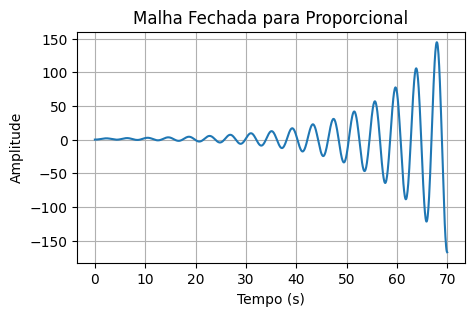

In [37]:
Cs = 2
Gmf = ct.feedback(Cs*Gs, 1, -1)
print("\nPolos de Malha Fechada: ")
print(ct.poles(Gmf))
t1, y1 = ct.step_response(Gmf, T=70)

plt.figure(figsize=(5, 3))
plt.plot(t1, y1)
plt.title("Malha Fechada para Proporcional")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [38]:
ct.step_info(Gmf)

{'RiseTime': 0.7597080997524572,
 'SettlingTime': nan,
 'SettlingMin': -617.2940150370049,
 'SettlingMax': 694.4405277155371,
 'Overshoot': 72925.64261836481,
 'Undershoot': 64913.10678660909,
 'Peak': 694.4405277155371,
 'PeakTime': 88.47146143480889,
 'SteadyStateValue': 0.9509543535887983}

O Controlador proporcional faz tira o sistema da estabilidade, tornando ele instável, isso mostra que a importancia de projetar corretamente um controlador para aplicar ao sistema, caso contrário, pode piorar a situação e tornar o sistema instável.

## Solução 2.
2. *Proponha especificações de desempenho em malha fechada com base na análise de malha aberta do item 1 (20%).*


 espeficifações do projeto:


**Sobrecinal $\le 5\%$**\
**Frequência natural $w_n$ ser 2x maior**

$$
    \xi = \frac{-\ln{(\%UP/100)}}{\sqrt{\pi^2+\ln^2{(\%UP/100)}}}
$$

In [39]:
from IPython.display import display, Latex

wn = 2*0.603
Up = 5

xi = (-np.log(Up/100))/(np.sqrt(np.pi**2+np.log(Up/100)**2))
display(Latex(f"$\\xi = {xi}$"))

# Pólos dominantes a partir dos requisitos desejados
p = -xi*wn+1j*wn*np.sqrt(1-xi**2)
display(Latex(f"$p_{{1,2}} = {np.real(p):.4f}\pm {np.imag(p):.4f}j$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Temos conhecimento de que o sistema é de terceira ordem. Ao introduzirmos o integrador, ele passará a ser de quarta ordem (antes do observador). Portanto, além dos polos dominantes, devemos alocar mais dois polos. Optaremos por colocar um polo acima do zero, para cancelar, e outro polo real arbitrário, cuja parte real será quatro vezes maior que a parte real do polo dominante.

In [40]:
polos_desejados = [p,np.conjugate(p),ct.zeros(Gs)[0],4*np.real(p)]
print(polos_desejados)
poli_mf = np.poly(polos_desejados)
print(poli_mf)

[(-0.832268717055145+0.8727913740473051j), (-0.832268717055145-0.8727913740473051j), (-4.909890109890109+0j), -3.32907486822058]
[ 1.          9.90350241 31.51389339 39.19056374 23.77332623]


## Solução 3.
3. *Projete um compensador de estados de ordem completa, de acordo com as especificações estabelecidas no item 2 e também forneça rejeição à distúrbios do tipo degrau. Justifique as escolhas de todos os pólos e apresente as funções de transferência do compensador ao final (35%).*


Então o polinômio desejado é:
$$
\begin{align}
    \alpha(s) &=s^4 + 9.903s^3 + 31.51s^2 + 39.19s + 23.77
\end{align}
$$

Vamos agora definir o sistema no espaço de estados usando FCC

In [41]:
F = np.block([[-den[1:]],[np.eye(2), np.zeros((2,1))]])
G = np.block([[1],[np.zeros((2,1))]])
H = np.block([[0,num]])
J = 0
n = F.shape[0]

F

array([[-1.84685   , -1.13207534, -0.23043793],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ]])

A partir das matrizes acima, podemos aumentar as matrizes para o projeto com integrador:

In [42]:
Fa = np.block([ [   F,   np.zeros((n,1)) ],
                [  -H,   0          ]])

Ga = np.block([[G], [0]])

print(Fa)
print("")
print(Ga)

[[-1.84685    -1.13207534 -0.23043793  0.        ]
 [ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [-0.         -0.455      -2.234       0.        ]]

[[1.]
 [0.]
 [0.]
 [0.]]



Alocação de polos com integrador

In [43]:
Ka = ct.acker(Fa,Ga,polos_desejados)
K = Ka[:,0:n]
Ki = Ka[:,-1]
print(Ka)
print("")
print(K)
print("")
print(Ki)

[[  8.05665241  30.38181805  34.11819948 -10.64159634]]

[[ 8.05665241 30.38181805 34.11819948]]

[-10.64159634]


Será usado Polos do observador reais e iguais, a um fator de 4 da parte real dos pólos dominantes:

In [44]:
po = 4*np.real(p)
#print(po)
L = ct.acker(F.T, H.T, [po]*n).T      # [po]*n = repete a lista n vezes, ou seja [po,po,po]
print("Ganhos do observador. L = ")
print(L)

Ganhos do observador. L = 
[[0.03924773]
 [7.63842191]
 [2.08813457]]


#### Equações do controlador

In [45]:
Fc = np.block([[F-G@K-L@H, np.zeros((n,1))],[np.zeros((1,n+1))]])
Gc = np.block([[L, np.zeros((n,1))],[np.array([-1,1])]])
Hc = -Ka
cont = ct.ss(Fc,Gc,Hc,0)
print(cont)

<LinearIOSystem>: sys[76]
Inputs (2): ['u[0]', 'u[1]']
Outputs (1): ['y[0]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ -9.90350241 -31.53175111 -34.43631683   0.        ]
     [  1.          -3.47548197 -17.06423454   0.        ]
     [  0.           0.04989877  -4.66489264   0.        ]
     [  0.           0.           0.           0.        ]]

B = [[ 0.03924773  0.        ]
     [ 7.63842191  0.        ]
     [ 2.08813457  0.        ]
     [-1.          1.        ]]

C = [[ -8.05665241 -30.38181805 -34.11819948  10.64159634]]

D = [[0. 0.]]



#### Funções de transferência para o controlador

In [46]:
(ct.tf(cont))

TransferFunction([[array([ -314.27033816,  -940.4452486 , -1909.54300479, -3381.96584134]), array([  10.64159634,  192.01565564, 1375.04541306, 3381.96584134])]], [[array([1.00000000e+00, 1.80438770e+01, 1.29214205e+02, 3.17806251e+02,
       4.54747351e-13]), array([1.00000000e+00, 1.80438770e+01, 1.29214205e+02, 3.17806251e+02,
       4.54747351e-13])]])

## Solução 4.
4. *Analise e simule o sistema em malha fechada. Plote e analise os sinais de saída e de controle (20%). Opcional: faça uma análise de resposta a uma perturbação (+10% extra)*


#### Simulações

In [47]:
Fmf = np.block([[F,-G@K,-G*Ki],[L@H,F-G@K-L@H,-G*Ki],[-H,np.zeros((1,n+1))]])
Gmf = np.block([[np.zeros((2*n,1))],[1]])
Hmf_y = np.block([[H,np.zeros((1,n+1))]])
Hmf_u = np.block([[-Ka,np.zeros((1,n))]])
Jmf = 0
MF_y = ct.ss(Fmf,Gmf,Hmf_y,Jmf)
MF_u = ct.ss(Fmf,Gmf,Hmf_u,Jmf)
#print(MF)
T=(ct.damp(MF_y))
print("")
print(ct.zeros(MF_y))

_____Eigenvalue______ Damping___ Frequency_
   -0.8323   +0.8728j     0.6901      1.206
   -0.8323   -0.8728j     0.6901      1.206
    -3.328+0.0005828j          1      3.328
    -3.328-0.0005828j          1      3.328
     -3.33+0.0005819j          1       3.33
     -3.33-0.0005819j          1       3.33
     -4.91                     1       4.91

[-4.90989011+0.00000000e+00j -3.32903011+0.00000000e+00j
 -3.32909725+3.87606175e-05j -3.32909725-3.87606175e-05j]


In [48]:
ct.step_info(MF_y)

{'RiseTime': 1.8850642591324327,
 'SettlingTime': 5.289434040550707,
 'SettlingMin': 0.9063622522598286,
 'SettlingMax': 1.045663690960417,
 'Overshoot': 4.566369096041702,
 'Undershoot': 0,
 'Peak': 1.045663690960417,
 'PeakTime': 3.995210817862768,
 'SteadyStateValue': 0.9999999999999999}

In [49]:
ts = 4/abs(np.real(p))
t,y = ct.step_response(MF_y,3*ts)
t,u = ct.step_response(MF_u,3*ts)


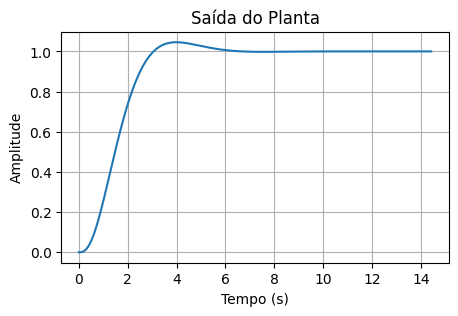

In [50]:
plt.figure(figsize=(5, 3))
plt.plot(t, y)
np.max(y)
plt.title("Saída do Planta")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

O sinal de saída com o controle em malha fechada tem erro em regime permanente nulo, além de o tempo de acomodação ser menor em relação ao sistema em malha aberta, o sobresinal está abaixo do valor especificado nos requisitos de projeto, sim como a frequência natual dos polos dominantes cumprirem com o requisito estipulado.

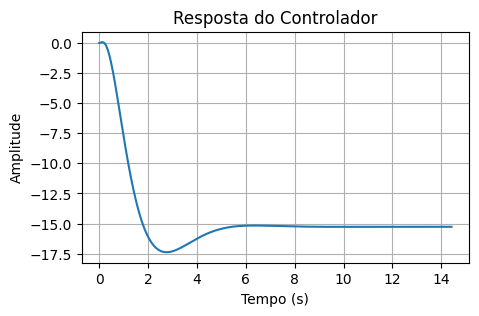

In [51]:
plt.figure(figsize=(5, 3))
plt.plot(t,u)
np.max(y)
plt.title("Resposta do Controlador")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.show()

O sinal de controle possui amplitude relativamente baixa, possibilitando sua implementação em uma planta real.